In [218]:
import pandas as pd

In [219]:
import numpy as np

In [220]:
import matplotlib.pyplot as plt

In [221]:
dataset = pd.read_csv('2019-Oct.csv', header='infer',
                      parse_dates = ['event_time'],
                      date_parser=pd.to_datetime)
# nrows=20000

In [222]:
#drop_dataset = dataset.dropna(subset=["category_code"])

In [223]:
#for weekday, frame in dataset.groupby([dataset.event_time.dt.weekday]): #gruped by weekday 1-mond 2-tues
#    print(f"First entry for {weekday!r}") #week of the day
#    print("--------------")
#    print(frame.head(10).user_session) #first entry of gorup 'weekday'

In [224]:
#for hour, frame in dataset.groupby([dataset.event_time.dt.hour]): #gruped by weekday 1-mond 2-tues
#    print(f"First entry for {hour!r}") #week of the day
#    print("--------------")
#    print(frame.head(1).brand) #first entry of gorup 'hour'

# [RQ5] In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.

#### view group by hours

In [225]:
only_viewers = dataset[dataset.event_type == 'view']

In [226]:
only_viewers.groupby([dataset.event_time.dt.hour]).event_time.count()

event_time
0      299874
1      545742
2     1037315
3     1485926
4     1826454
5     2020538
6     2154468
7     2217746
8     2267899
9     2229264
10    2181560
11    2086826
12    2040927
13    2263632
14    2590385
15    2892601
16    2972082
17    2663340
18    2069720
19    1304238
20     722821
21     425189
22     264826
23     216026
Name: event_time, dtype: int64

#### view group by weekday

In [227]:
only_viewers.groupby([dataset.event_time.dt.weekday]).event_time.count()

event_time
0    5108044
1    6548319
2    6398991
3    6135484
4    5584378
5    5380190
6    5623993
Name: event_time, dtype: int64

#### media visite by hour

In [228]:
only_viewers.groupby([dataset.event_time.dt.hour]).event_time.count().mean()

1699141.625

# [RQ5]Create a plot that for each day of the week show the hourly average of visitors your store has.

In [229]:
for wkday, frame in only_viewers.groupby([dataset.event_time.dt.weekday]):
    print(f"Weekday: {wkday!r}")
    print(frame.groupby([dataset.event_time.dt.hour]).event_time.count().mean())

Weekday: 0
212835.16666666666
Weekday: 1
272846.625
Weekday: 2
266624.625
Weekday: 3
255645.16666666666
Weekday: 4
232682.41666666666
Weekday: 5
224174.58333333334
Weekday: 6
234333.04166666666


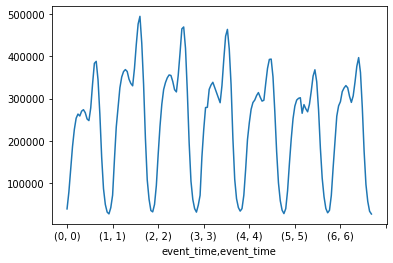

In [230]:
#plot of view grouped by weekday and hour
only_viewers.groupby([dataset.event_time.dt.weekday, dataset.event_time.dt.hour]).event_time.count().plot();

# [RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
# Find the overall conversion rate of your store.
# Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

#### Number of times a product has been bought

In [231]:
only_purchases = dataset[dataset.event_type == 'purchase']

In [232]:
only_purchases.groupby([dataset.product_id]).product_id.count()

product_id
1000978     12
1001588     12
1002042      3
1002062     18
1002098     13
            ..
59000007     1
60400006     1
60500001     4
60500002     4
60500009     1
Name: product_id, Length: 42241, dtype: int64

#### Number of times a product has been viewed

In [233]:
only_viewers.groupby([dataset.product_id]).product_id.count()

product_id
1000978     3153
1001588     2264
1001606       16
1002042      320
1002062     1556
            ... 
60500006      14
60500007      12
60500008       4
60500009       6
60500010      10
Name: product_id, Length: 166794, dtype: int64

# [RQ6]Find the overall conversion rate of your store. 

In [234]:
num = only_purchases.groupby([dataset.product_id]).product_id.count().sum()

In [235]:
denom = only_viewers.groupby([dataset.product_id]).product_id.count().sum()

In [236]:
overall_conv_rate = num / denom

In [237]:
print(overall_conv_rate)

0.01821628121591493


# [RQ6]Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

### Plot the number of purchases of each category 

In [238]:
#all_category = drop_dataset

In [239]:
purchases_category = only_purchases.dropna(subset=["category_code"])
purchases_category.category_code.replace('(?=\.).*','',regex=True, inplace = True)

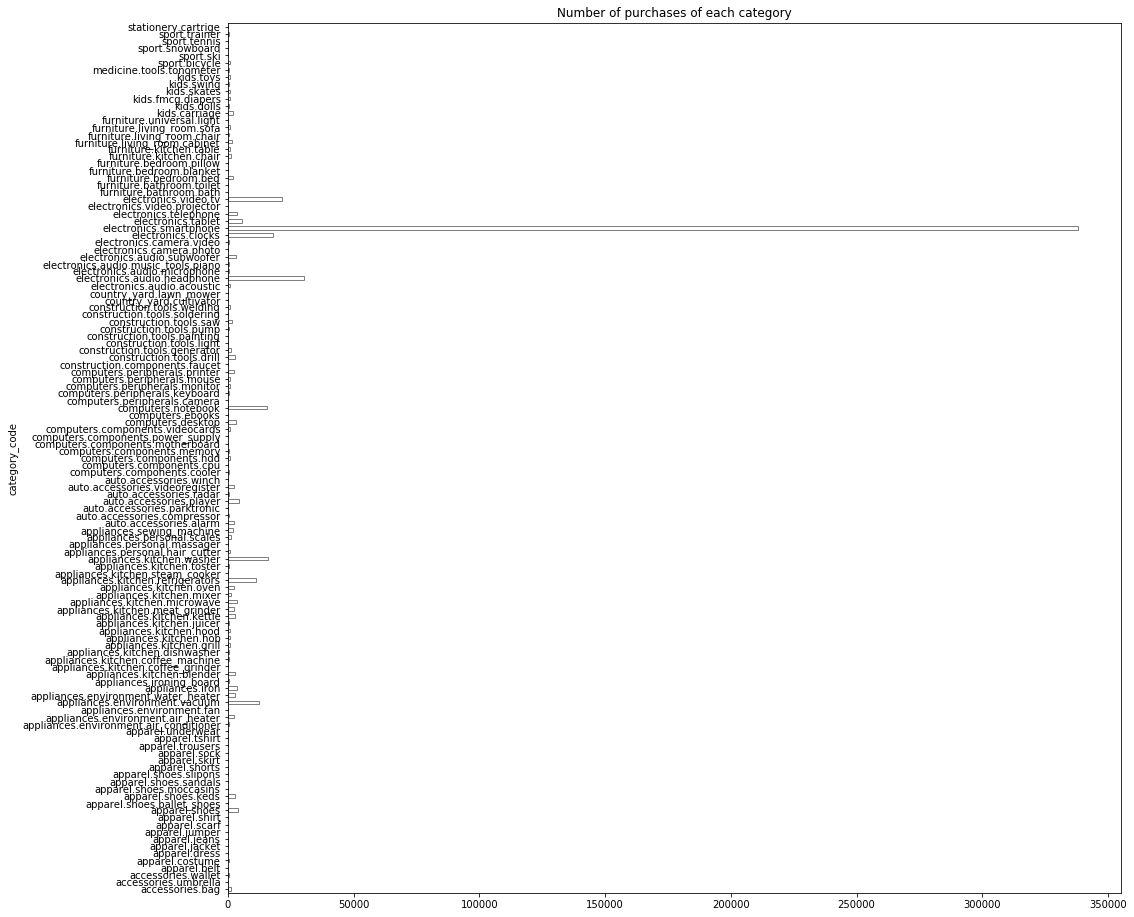

In [240]:
purchases_category = purchases_category.groupby([dataset.category_code]).category_code.count()
purchases_category.plot.barh(figsize=(16,16),\
                                 title="Number of purchases of each category",\
                                  color="white", edgecolor="black", alpha=0.5)
plt.show()

### Show the conversion rate of each category in decreasing order 

In [241]:
views_category = all_category[dataset.event_type == 'view']
views_category = views_category.groupby([dataset.category_code]).category_code.count()

C:\Users\Simone-MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [242]:
views_category

category_code
accessories.bag         114
accessories.umbrella      5
accessories.wallet       32
apparel.costume          16
apparel.dress             5
                       ... 
sport.ski                 1
sport.snowboard           2
sport.tennis              3
sport.trainer             4
stationery.cartrige      17
Name: category_code, Length: 115, dtype: int64

In [243]:
#for category, frame in dataset.groupby([dataset.category_id]):
    #print(f"category_id: {category!r}")
    #num = frame[dataset.event_type == 'purchase'].event_type.count().sum()
    #denom = frame[dataset.event_type == 'view'].event_type.count().sum()
    #conv_rate = num / denom
    #print(conv_rate)
purchases_category
#denom = only_viewers.product_id.count()
#print(num)
#print(denom)

category_code
accessories.bag         1253
accessories.umbrella      24
accessories.wallet       310
apparel.belt              21
apparel.costume          489
                        ... 
sport.ski                 16
sport.snowboard            6
sport.tennis               9
sport.trainer            367
stationery.cartrige      134
Name: category_code, Length: 121, dtype: int64

In [244]:
for i, frame in purchases_category:
    print(i)

TypeError: cannot unpack non-iterable int object

# [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
# Prove that the pareto principle applies to your store.

In [111]:
#business

In [112]:
#x = only_purchases.groupby([dataset.user_id]).price.count()
#for i, frame in only_purchases.groupby([dataset.user_id]):
#    print(f'user_id: {i}')
#    print(f'{frame.price}')
#groupby(['Name', 'Fruit'])['Number'].agg('sum')
x = only_purchases.groupby([dataset.user_id])['price'].agg('sum').sort_values(ascending=False)

In [113]:
my_sum=0
length = 0
my_array = []

In [114]:

for i in x:
    my_sum+=int(i)
    my_array.append(my_sum)
    length+=1

In [115]:
print(f'length: {length}')
print(len(my_array))

length: 228
228


In [116]:
#my_array normalized
my_array_normalized = [float(i)/max(my_array) for i in my_array]

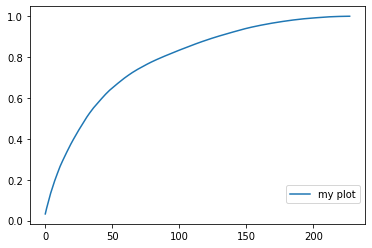

In [117]:
plt.plot(my_array_normalized, label='my plot')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

In [118]:
dataset.groupby([dataset.event_type]).event_type.count()

event_type
cart          194
purchase      258
view        19548
Name: event_type, dtype: int64

In [119]:
#ill try to compare 20% of top purchases with the other 80%

In [120]:
count=0
sum_twenty=0

for i in my_array:
    count+=1
    
    if count==int(length/100*20):
        sum_twenty+=i
        break
print(sum_twenty)

42737


In [121]:
print(f'20% of purchases: {sum_twenty}\n80% of purchases: {max(my_array)-sum_twenty}\nRatio: {sum_twenty/max(my_array)}')

20% of purchases: 42737
80% of purchases: 27151
Ratio: 0.6115069826007326
